In [2]:
import cmdstanpy
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Exercise 1
We will analyze the effect of the non-informative prior distribution on Bayesian inference. You aim to compare two models, one with a uniform prior, second with the beta distribution. Please, generate 200 draws of a biased coin with a probability of getting a tail equal to 0.7 and compare inference results as a function of flips number. Plot and interpret the results.

In [17]:
tail_prob = 0.7
n_trials = 200

> I assume that we are supposed to do two posterior models, but one with uniform and second with beta prior for theta parameter. But I may be wrong

In [22]:
model_1 = cmdstanpy.CmdStanModel(stan_file='model_uniform.stan')
model_2 = cmdstanpy.CmdStanModel(stan_file='model_beta.stan')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /Users/barthap/studia/da/lab3-oneparam/model_uniform
INFO:cmdstanpy:compiling stan program, exe file: /Users/barthap/studia/da/lab3-oneparam/model_beta
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /Users/barthap/studia/da/lab3-oneparam/model_beta


In [23]:
print('Uniform model:')
with open('model_uniform.stan') as f:
    print(f.read())

print('\nBeta model:')
with open('model_beta.stan') as f:
    print(f.read())  

Uniform model:
data {
  int S; //number of successes
  int N; //number of trials
}

parameters {
  real <lower=0,upper=1> theta;
}

model {
  theta ~ beta(1,1);//uniform prior
  S ~ binomial(N,theta);
}
generated quantities {
  int S_sim=0;
  S_sim = binomial_rng(N,theta);
}


Beta model:
data {
  int S; //number of successes
  int N; //number of trials
}

parameters {
  real <lower=0,upper=1> theta;
}

model {
  theta ~ beta(2,5);//beta prior
  S ~ binomial(N,theta);
}
generated quantities {
  int S_sim=0;
  S_sim = binomial_rng(N,theta);
}



Manually calculate the number of successes:

In [24]:
binom = np.random.binomial(1, tail_prob, n_trials) # result of flipping a coin tested 200 times with the probability of 0.7
manual_rate = sum(binom)/len(binom)
print('Success rate:', manual_rate)

Success rate: 0.7


### Uniform
Do the sampling stuff

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 1


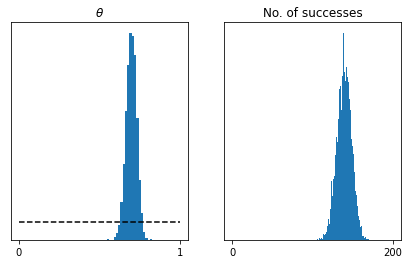

In [21]:
data = dict(S = int(tail_prob * n_trials),
            N = n_trials)
fit = model_1.sample(data=data, seed=123456)
theta=fit.stan_variable('theta')
S_sim=fit.stan_variable('S_sim')

fig, axes = plt.subplots(1, 2, figsize=(7, 4))

ax1=axes[0]
ax1.hist(theta,bins=20,density=True)
ax1.set_xticks([0,1])
ax1.set_yticks([])
ax1.set_title(r'$\theta$')

ax2=axes[1]
ax2.hist(S_sim,density=True,bins=np.linspace(-0.5,data['N']+0.5,data['N']+2))
ax2.set_xticks([0,n_trials])
ax2.set_yticks([])
ax2.set_title('No. of successes')
plt.show()

### Beta

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4


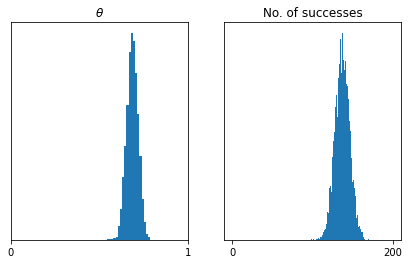

In [26]:
data = dict(S = int(tail_prob * n_trials),
            N = n_trials)
fit = model_2.sample(data=data, seed=123456)
theta=fit.stan_variable('theta')
S_sim=fit.stan_variable('S_sim')

fig, axes = plt.subplots(1, 2, figsize=(7, 4))

ax1=axes[0]
ax1.hist(theta,bins=20,density=True)
ax1.set_xticks([0,1])
ax1.set_yticks([])
ax1.set_title(r'$\theta$')

ax2=axes[1]
ax2.hist(S_sim,density=True,bins=np.linspace(-0.5,data['N']+0.5,data['N']+2))
ax2.set_xticks([0,n_trials])
ax2.set_yticks([])
ax2.set_title('No. of successes')
plt.show()

## Conclusion

I probably made this exercise wrong - but I can see no difference. Regardless of the prior, the data was fit so well, that both posterior models look very similar. In this case, even badly chosen prior model would be "fixed" by data provided.

# Exercise 2 part 1
We consider the number of fatal accidents and deaths on scheduled airline flights per year over a ten-year period Source: Gelman et al. 2014 Reproduced from Statistical Abstract of the United States.
Our goal is to create a model predicting such number in 1986.

Using the data from the following table create a model predicting the number of passenger deaths. Use Poisson distribution assuming that the accident rate is constant for all years and not depending on anything.

In [6]:
dts=[24,734,25,516,31,754,31,877,22,814,21,362,26,764,20,809,16,223,22,1066]
c1=dts[::2]
c2=dts[1::2]

Airline_data=pd.DataFrame({'Year':[1976,1977,1978,1979,1980,1981,1982,1983,1984,1985],
'Fatal accidents':c1,  
'Passenger deaths':c2,
'Death rate':[0.19,0.12,0.15,0.16,0.14,0.06,0.13,0.13,0.03,0.15]}).set_index('Year')
Airline_data['Miles flown [100 mln miles]']=np.round(Airline_data['Passenger deaths']/Airline_data['Death rate'])
Airline_data

,Fatal accidents,Passenger deaths,Death rate,Miles flown [100 mln miles]
Year,,,,
1976,24,734,0.19,3863.0
1977,25,516,0.12,4300.0
1978,31,754,0.15,5027.0
1979,31,877,0.16,5481.0
1980,22,814,0.14,5814.0
1981,21,362,0.06,6033.0
1982,26,764,0.13,5877.0
1983,20,809,0.13,6223.0
1984,16,223,0.03,7433.0




We use Poisson distribution for accidents. If we want to have less than 1% probability of the accident, $\lambda$ can be approximated from this equation: $\lambda+3\sqrt{\lambda}\approx365$



In [3]:
# upper bound of lambda
root_of_lam=np.polynomial.polynomial.polyroots([-365.,3.,1.])
lam_ub=np.round(root_of_lam[root_of_lam>0]**2)
print(lam_ub[0])

312.0


> _some calculations omitted_

In [ ]:
# our tuned sigma for normal distribution
sigma = 121.0


In [4]:
with open('flight1.stan') as f:
    print(f.read()) 

data {
  int M;//number of years analyzed
  int y[M];//number of fatal accidents
}
parameters {
  real<lower=0>lambda;
}
model {
  lambda ~ normal(0,121);
  for (k in 1:M) {
    y[k] ~ poisson(lambda);
  }
}
generated quantities {
  int y_sim[M];
  for (k in 1:M) {
    y_sim[k] = poisson_rng(lambda);
  }
}


In [7]:
model = cmdstanpy.CmdStanModel(stan_file='flight1.stan')
data = dict(M = len(Airline_data),
            y = Airline_data['Fatal accidents'].values)
fit = model.sample(data=data, seed=123456)

lam=fit.stan_variable('lambda')
y_sim=fit.stan_variable('y_sim')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /Users/barthap/studia/da/lab3-oneparam/flight1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 1


## Predicting accidents in 1986

We can use our model to predict accidents. From data we know that there were 22 accidents in 1986. Let's see what model predicts:

In [10]:
median_y_sim = np.median(y_sim.flatten())
cinf_y_sim = az.hdi(y_sim.flatten(),0.9)

print('Median of predicted accidents =',median_y_sim)
print('90% confidence inteval = [',*cinf_y_sim,']')

Median of predicted accidents = 24.0
90% confidence inteval = [ 15.0 31.0 ]


Well, looking only at median, it predicted number of accidents not badly, but in reality it's very unconfident. For 90% it sait it's between 15 and 31 accidents.

# Exercise 2 part 2
Using the same data as before, create a model predicting the number of passenger deaths. Use Poisson distribution assuming that the intensity is constant, but the rate is a product of intensity and miles flown.

Similarly as above should consider miles flown in the parameter bounds: $\theta\cdot\bar{n}+3\sqrt{\theta\cdot\bar{n}}\approx365$, where n is the miles flown in hundreds millions

In [11]:
mean_miles=np.mean(Airline_data['Miles flown [100 mln miles]'])
root_of_theta=np.polynomial.polynomial.polyroots([-365/mean_miles,3./np.sqrt(mean_miles),1.])
theta_ub=(root_of_theta[root_of_lam>0]**2)
print('theta upper bound','{:4.3f}'.format(theta_ub[0]))

theta upper bound 0.055


In [ ]:
# tuning omitted
sigma=0.021

In [14]:
miles1986 = 546/0.06 # = 9100

model1986 = cmdstanpy.CmdStanModel(stan_file='flight2.stan')

with open('flight2.stan') as f:
    print(f.read())

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /Users/barthap/studia/da/lab3-oneparam/flight2
9100.0
data {
  int M;//number of years analyzed
  vector[M] miles; //number of miles flown each year
  int y[M];//number of fatal accidents
}
parameters {
  real<lower=0>theta;
}
model {
  theta ~ normal(0,0.021);
  for (k in 1:M) {
    y[k] ~ poisson(miles[k]*theta);
  }
}
generated quantities {
  int y_1986 = poisson_rng(9100*theta);
}


In [15]:
data = dict(M = len(Airline_data),
            miles = Airline_data['Miles flown [100 mln miles]'].values,
            y = Airline_data['Fatal accidents'].values)
fit1986 = model1986.sample(data=data, seed=123456)

y_1986=fit1986.stan_variable('y_1986')

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 2


### Results

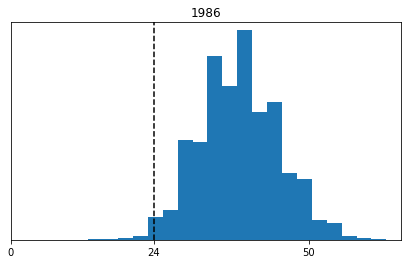

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.hist(y_1986,bins=20,density=True)
ax.set_title('1986')
tv = 22 # Real number of accidents
ax.plot([tv,tv],[0,0.07],linestyle='--',color='black')
ax.set_yticks([])
ax.set_xticks([0,tv,50])
ax.set_xticklabels(['0',tv,50])
ax.set_ylim([0,0.07])


plt.show()

The model, even after adding "miles flown" predictor, predicts more than 22 accidents. Let's see the median and quantiles:

In [16]:
median_y_1986 = np.median(y_1986)
cinf_y_1986 = az.hdi(y_1986,0.89)

print('Median of predicted accidents =',median_y_1986)
print('Confidence interval = [',*cinf_y_1986,']')

Median of predicted accidents = 38.0
Confidence interval = [ 28.0 48.0 ]


The model predicted much more accidents that really happened. That may mean there's something more in the data which our model doesn't "see" - we probably need to build more complicated model including more properties to properly predict the number of accidents.